In [73]:
import pandas as pd
import numpy as np 

uci_data = pd.read_csv('UCI_Heart_Disease.csv')
uci_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145,233,1.0,lv hypertrophy,150,0.0,2.3,downsloping,0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160,286,0.0,lv hypertrophy,108,1.0,1.5,flat,3,normal,2
2,3,67,Male,Cleveland,asymptomatic,120,229,0.0,lv hypertrophy,129,1.0,2.6,flat,2,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130,250,0.0,normal,187,0.0,3.5,downsloping,0,normal,0
4,5,41,Female,Cleveland,atypical angina,130,204,0.0,lv hypertrophy,172,0.0,1.4,upsloping,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127,333,1.0,st-t abnormality,154,0.0,0.0,NaN,0,NaN,1
916,917,62,Male,VA Long Beach,typical angina,0,139,0.0,st-t abnormality,0,NaN,0.0,NaN,0,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122,223,1.0,st-t abnormality,100,0.0,0.0,NaN,0,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,0,385,1.0,lv hypertrophy,0,NaN,0.0,NaN,0,NaN,0


In [74]:
print('--IDENTIFYING MISSING DATA AND ANALYZING MISSING DATA--')

--IDENTIFYING MISSING DATA AND ANALYZING MISSING DATA--


In [75]:
missing_data_info = uci_data.isnull().sum()
missing_data_pct = (missing_data_info / len(uci_data) * 100).round(2)
missing_data_summ = pd.DataFrame({
    'Missing_Count': missing_data_info,
    'Missing_Percentage': missing_data_info
})
print(missing_data_summ)

          Missing_Count  Missing_Percentage
id                    0                   0
age                   0                   0
sex                   0                   0
dataset               0                   0
cp                    0                   0
trestbps              0                   0
chol                  0                   0
fbs                  90                  90
restecg               2                   2
thalch                0                   0
exang                55                  55
oldpeak               0                   0
slope               309                 309
ca                    0                   0
thal                486                 486
num                   0                   0


In [76]:
# 'thal' column analysis
print(f"\nThal column value counts:")
print(uci_data['thal'].value_counts(dropna=False))


Thal column value counts:
thal
NaN                  486
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


In [77]:
# Handling of missing values
# Create missing indicators
uci_data['thal_missing'] = uci_data['thal'].isnull() | (uci_data['thal'].isin(['null', '', '?']))
uci_data['ca_missing'] = uci_data['ca'].isnull() | (uci_data['ca'].isin(['null', '', '?']))

In [78]:
# https://pmc.ncbi.nlm.nih.gov/articles/PMC4937666/ # Reference
# Clinical imputation
# Replace missing thal with the most common value ('normal' based on clinical knowledge)
most_common_thal = uci_data['thal'].mode()[0]
uci_data['thal'] = uci_data['thal'].fillna(most_common_thal)
uci_data['thal'] = uci_data['thal'].replace(['null', '', '?'], most_common_thal)

# Handle other missing values in columns 'ca' and 'slope'
for column in ['ca', 'slope']:
    if uci_data[column].isnull().sum() > 0:
        most_common = uci_data[column].mode()[0]
        uci_data[column] = uci_data[column].fillna(most_common)
        uci_data[column] = uci_data[column].replace(['null', '', '?'], most_common)

In [79]:
# Examine cleaned data
print(f"Rows retained: {len(uci_data)} (kept all your data)")
print(f"Missing values remaining: {uci_data.isnull().sum().sum()}")
print(f"New feature columns created: {sum(1 for col in uci_data.columns if '_missing' in col)}")

Rows retained: 920 (kept all your data)
Missing values remaining: 147
New feature columns created: 2


In [80]:
uci_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thal_missing,ca_missing
0,1,63,Male,Cleveland,typical angina,145,233,1.0,lv hypertrophy,150,0.0,2.3,downsloping,0,fixed defect,0,False,False
1,2,67,Male,Cleveland,asymptomatic,160,286,0.0,lv hypertrophy,108,1.0,1.5,flat,3,normal,2,False,False
2,3,67,Male,Cleveland,asymptomatic,120,229,0.0,lv hypertrophy,129,1.0,2.6,flat,2,reversable defect,1,False,False
3,4,37,Male,Cleveland,non-anginal,130,250,0.0,normal,187,0.0,3.5,downsloping,0,normal,0,False,False
4,5,41,Female,Cleveland,atypical angina,130,204,0.0,lv hypertrophy,172,0.0,1.4,upsloping,0,normal,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127,333,1.0,st-t abnormality,154,0.0,0.0,flat,0,normal,1,True,False
916,917,62,Male,VA Long Beach,typical angina,0,139,0.0,st-t abnormality,0,NaN,0.0,flat,0,normal,0,True,False
917,918,55,Male,VA Long Beach,asymptomatic,122,223,1.0,st-t abnormality,100,0.0,0.0,flat,0,fixed defect,2,False,False
918,919,58,Male,VA Long Beach,asymptomatic,0,385,1.0,lv hypertrophy,0,NaN,0.0,flat,0,normal,0,True,False


In [81]:
uci_data.to_csv('uci_data_cleaned.csv', index=False)

In [82]:
#147 missing values remain across the table... let's figure out what to do about that.
pd.read_csv('uci_data_cleaned.csv')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thal_missing,ca_missing
0,1,63,Male,Cleveland,typical angina,145,233,1.0,lv hypertrophy,150,0.0,2.3,downsloping,0,fixed defect,0,False,False
1,2,67,Male,Cleveland,asymptomatic,160,286,0.0,lv hypertrophy,108,1.0,1.5,flat,3,normal,2,False,False
2,3,67,Male,Cleveland,asymptomatic,120,229,0.0,lv hypertrophy,129,1.0,2.6,flat,2,reversable defect,1,False,False
3,4,37,Male,Cleveland,non-anginal,130,250,0.0,normal,187,0.0,3.5,downsloping,0,normal,0,False,False
4,5,41,Female,Cleveland,atypical angina,130,204,0.0,lv hypertrophy,172,0.0,1.4,upsloping,0,normal,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127,333,1.0,st-t abnormality,154,0.0,0.0,flat,0,normal,1,True,False
916,917,62,Male,VA Long Beach,typical angina,0,139,0.0,st-t abnormality,0,NaN,0.0,flat,0,normal,0,True,False
917,918,55,Male,VA Long Beach,asymptomatic,122,223,1.0,st-t abnormality,100,0.0,0.0,flat,0,fixed defect,2,False,False
918,919,58,Male,VA Long Beach,asymptomatic,0,385,1.0,lv hypertrophy,0,NaN,0.0,flat,0,normal,0,True,False


In [83]:
uci_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thal_missing,ca_missing
0,1,63,Male,Cleveland,typical angina,145,233,1.0,lv hypertrophy,150,0.0,2.3,downsloping,0,fixed defect,0,False,False
1,2,67,Male,Cleveland,asymptomatic,160,286,0.0,lv hypertrophy,108,1.0,1.5,flat,3,normal,2,False,False
2,3,67,Male,Cleveland,asymptomatic,120,229,0.0,lv hypertrophy,129,1.0,2.6,flat,2,reversable defect,1,False,False
3,4,37,Male,Cleveland,non-anginal,130,250,0.0,normal,187,0.0,3.5,downsloping,0,normal,0,False,False
4,5,41,Female,Cleveland,atypical angina,130,204,0.0,lv hypertrophy,172,0.0,1.4,upsloping,0,normal,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127,333,1.0,st-t abnormality,154,0.0,0.0,flat,0,normal,1,True,False
916,917,62,Male,VA Long Beach,typical angina,0,139,0.0,st-t abnormality,0,NaN,0.0,flat,0,normal,0,True,False
917,918,55,Male,VA Long Beach,asymptomatic,122,223,1.0,st-t abnormality,100,0.0,0.0,flat,0,fixed defect,2,False,False
918,919,58,Male,VA Long Beach,asymptomatic,0,385,1.0,lv hypertrophy,0,NaN,0.0,flat,0,normal,0,True,False


In [84]:
# Identifying columns with missing values
missing_by_column = uci_data.isnull().sum()
print("Missing values per column:")
print(missing_by_column[missing_by_column > 0])

Missing values per column:
fbs        90
restecg     2
exang      55
dtype: int64


In [85]:
import pandas as pd
import numpy as np


print(f"Starting with {uci_data.isnull().sum().sum()} missing values")

#Handle all possible missing value representations
missing_representations = [
    '', 'null', 'NULL', 'Null', 'none', 'None', 'NONE',
    'nan', 'NaN', 'NAN', 'n/a', 'N/A', 'na', 'NA',
    '-', '?', '??', 'unknown', 'Unknown', 'UNKNOWN'
]

# Replace all missing representations with NaN
for col in uci_data.columns:
    uci_data[col] = uci_data[col].replace(missing_representations, np.nan)
    
    # Handle whitespace-only values
    if uci_data[col].dtype == 'object':
        uci_data[col] = uci_data[col].apply(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)

print(f"After standardizing: {uci_data.isnull().sum().sum()} missing values")

# Smart imputation by column type and clinical knowledge
print("\n=== IMPUTING MISSING VALUES ===")

# Numeric columns
numeric_columns = uci_data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if uci_data[col].isnull().sum() > 0:
        if col in ['age', 'trestbps', 'chol', 'thalach']:  # Continuous variables
            fill_value = uci_data[col].median()
        else:  # Discrete variables
            fill_value = uci_data[col].mode()[0]
        
        uci_data[col].fillna(fill_value, inplace=True)
        print(f" Filled {col}: {uci_data[col].isnull().sum()} -0 missing values")

# Categorical columns
categorical_columns = uci_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if uci_data[col].isnull().sum() > 0:
        if col == 'thal':
            # Based on European studies - 'normal' is most common
            fill_value = 'normal'
        else:
            # Use most common value for other categorical columns
            fill_value = uci_data[col].mode()[0] if len(uci_data[col].mode()) > 0 else 'unknown'
        
        uci_data[col].fillna(fill_value, inplace=True)
        print(f" Filled {col}: {uci_data[col].isnull().sum()} -0 missing values")

# Final verification
final_missing = uci_data.isnull().sum().sum()
print(f"\n FINAL RESULT: {final_missing} missing values remaining")

# Save the clean dataset
uci_data.to_csv('uci_heart_disease_perfect.csv', index=False)

Starting with 147 missing values
After standardizing: 147 missing values

=== IMPUTING MISSING VALUES ===
 Filled fbs: 0 -0 missing values
 Filled exang: 0 -0 missing values
 Filled restecg: 0 -0 missing values

 FINAL RESULT: 0 missing values remaining


C:\Users\Oniichan_11\AppData\Local\Temp\ipykernel_36888\2009318371.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uci_data[col].fillna(fill_value, inplace=True)
C:\Users\Oniichan_11\AppData\Local\Temp\ipykernel_36888\2009318371.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [86]:
uci_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thal_missing,ca_missing
0,1,63,Male,Cleveland,typical angina,145,233,1.0,lv hypertrophy,150,0.0,2.3,downsloping,0,fixed defect,0,False,False
1,2,67,Male,Cleveland,asymptomatic,160,286,0.0,lv hypertrophy,108,1.0,1.5,flat,3,normal,2,False,False
2,3,67,Male,Cleveland,asymptomatic,120,229,0.0,lv hypertrophy,129,1.0,2.6,flat,2,reversable defect,1,False,False
3,4,37,Male,Cleveland,non-anginal,130,250,0.0,normal,187,0.0,3.5,downsloping,0,normal,0,False,False
4,5,41,Female,Cleveland,atypical angina,130,204,0.0,lv hypertrophy,172,0.0,1.4,upsloping,0,normal,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127,333,1.0,st-t abnormality,154,0.0,0.0,flat,0,normal,1,True,False
916,917,62,Male,VA Long Beach,typical angina,0,139,0.0,st-t abnormality,0,0.0,0.0,flat,0,normal,0,True,False
917,918,55,Male,VA Long Beach,asymptomatic,122,223,1.0,st-t abnormality,100,0.0,0.0,flat,0,fixed defect,2,False,False
918,919,58,Male,VA Long Beach,asymptomatic,0,385,1.0,lv hypertrophy,0,0.0,0.0,flat,0,normal,0,True,False


# Model selection for training and testing on data
Based on `https://scikit-learn.org/stable/machine_learning_map.html` and the nautre of our data-which is to classify patients as having heart disease(with various grades) or not, using `RandomForestClassifier` estimator is appropriate for the following reasons:

Handles mixed categorical/numerical features excellently

Provides interpretable feature importance rankings

Robust to outliers and missing data

Excellent for medical/healthcare datasets

Less prone to overfitting

Can capture non-linear relationships                                                                                                                                                                                                                                          

In [87]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
uci_data.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thal_missing,ca_missing
0,1,63,Male,Cleveland,typical angina,145,233,1.0,lv hypertrophy,150,0.0,2.3,downsloping,0,fixed defect,0,False,False
1,2,67,Male,Cleveland,asymptomatic,160,286,0.0,lv hypertrophy,108,1.0,1.5,flat,3,normal,2,False,False
2,3,67,Male,Cleveland,asymptomatic,120,229,0.0,lv hypertrophy,129,1.0,2.6,flat,2,reversable defect,1,False,False
3,4,37,Male,Cleveland,non-anginal,130,250,0.0,normal,187,0.0,3.5,downsloping,0,normal,0,False,False
4,5,41,Female,Cleveland,atypical angina,130,204,0.0,lv hypertrophy,172,0.0,1.4,upsloping,0,normal,0,False,False


In [89]:
# Split data into X (independent variables) and y (dependent/outcome variable)
X = uci_data.drop(columns=['num', 'id'])
y = uci_data['num']

In [90]:
# Import train_test_split from sklearn's model_selection module to split data into training and test set
from sklearn.model_selection import train_test_split

# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((736, 16), (184, 16), (736,), (184,))

In [91]:
# Importing the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier as model
model = RandomForestClassifier(n_estimators = 100)

In [92]:
# Building a pipeline to ensure the feeding of only numerical data into model

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline

# Defining the different categorical features with column indices over names
categorical_indices = []
numerical_indices = []
categorical_names = []
numerical_names = []

for i, col in enumerate(X.columns):
    if X[col].dtype == 'object':
        categorical_indices.append(i)
        categorical_names.append(col)
    else:
        numerical_indices.append(i)
        numerical_names.append(col)

# Alternative approach to identify column types
categorical_cols = [col for col in uci_data.columns if uci_data[col].dtype == 'object' and col != 'num']
numerical_cols = [col for col in uci_data.columns if uci_data[col].dtype != 'object' and col != 'num']

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

print(f"Categorical columns (indices): {categorical_indices}")
print(f"Categorical names: {categorical_names}")
print(f"Numerical columns (indices): {numerical_indices}")
print(f"Numerical names: {numerical_names}")

Categorical columns: ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']
Numerical columns: ['id', 'age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca', 'thal_missing', 'ca_missing']
Categorical columns (indices): [1, 2, 3, 7, 11, 13]
Categorical names: ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']
Numerical columns (indices): [0, 4, 5, 6, 8, 9, 10, 12, 14, 15]
Numerical names: ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca', 'thal_missing', 'ca_missing']


In [95]:
# Create preprocessor with column indices
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_indices),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_indices)
    ],
    remainder='drop'
)

# Apply preprocessing
X = uci_data.drop(columns=['num', 'id'])
y = uci_data['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Fit the RandomForestClassifier to the training data

# But first, apply the pipeline preprocessor to the X_train and X_test data with categorical values
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Go on to fit model on transformed X_train with y_train
model.fit(X_train, y_train)

RandomForestClassifier()

In [97]:
# Score model on test data
model.score(X_test, y_test)

0.5706521739130435

In [98]:
# Convert to binary classification
# "Converting multi-class to binary classification" for y ('num' values)

# Original: 0=no disease, 1,2,3,4=different severities of disease
# Convert to: 0=no disease, 1=disease present
y_binary = (y > 0).astype(int)


print("Binary target distribution:")
print(y_binary.value_counts())

# Calculate class balance
no_disease = (y_binary == 0).sum()
disease = (y_binary == 1).sum()
print(f"No disease (0): {no_disease} ({no_disease/len(y_binary)*100:.1f}%)")
print(f"Disease (1): {disease} ({disease/len(y_binary)*100:.1f}%)")

y = y_binary 
# Create train-test split with binary target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_binary
)

print(f"✅  train set: {X_train.shape}")
print(f"✅  test set: {X_test.shape}")

Binary target distribution:
num
1    509
0    411
Name: count, dtype: int64
No disease (0): 411 (44.7%)
Disease (1): 509 (55.3%)
✅  train set: (736, 16)
✅  test set: (184, 16)


In [99]:
# Pipeline creation with preprocessor for model improvement
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])  #rf is randomforest

param_grid = {
    'classifier__n_estimators': [50, 100, 200, 500],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}


rsearch = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_grid,
    n_iter=30,  # Reduced for faster testing
    cv=5,
    scoring='roc_auc',  
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("\nStarting classification hyperparameter tuning...")
rsearch.fit(X_train, y_train)

print(f"Best ROC-AUC: {rsearch.best_score_:.4f}")
print(f"Best parameters: {rsearch.best_params_}")

# Final evaluation
best_model = rsearch.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nFinal Classification Results:")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test ROC-AUC: {auc:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))


Starting classification hyperparameter tuning...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ SUCCESS! Best ROC-AUC: 0.8908
Best parameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 10, 'classifier__bootstrap': False}

Final Classification Results:
Test Accuracy: 0.8370
Test ROC-AUC: 0.9201

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        82
           1       0.84      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [100]:
# Obtain optimized model
best_model = rsearch.best_estimator_

print(f"Best parameters: {rsearch.best_params_}")
print(f"Best CV ROC-AUC score: {rsearch.best_score_:.4f}")

#Final model evaluation on test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

print("\n TEST SET PERFORMANCE:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\n DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, 
                          target_names=['No Disease', 'Disease']))

print("\n CONFUSION MATRIX:")
cm = confusion_matrix(y_test, y_pred)
print(f"True Negatives (correctly predicted no disease): {cm[0,0]}")
print(f"False Positives (incorrectly predicted disease): {cm[0,1]}")
print(f"False Negatives (missed disease cases): {cm[1,0]}")
print(f"True Positives (correctly predicted disease): {cm[1,1]}")

Best parameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 10, 'classifier__bootstrap': False}
Best CV ROC-AUC score: 0.8908

 TEST SET PERFORMANCE:
Accuracy:  0.8370
Precision: 0.8396
Recall:    0.8725
F1-Score:  0.8558
ROC-AUC:   0.9201

 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

  No Disease       0.83      0.79      0.81        82
     Disease       0.84      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184


 CONFUSION MATRIX:
True Negatives (correctly predicted no disease): 65
False Positives (incorrectly predicted disease): 17
False Negatives (missed disease cases): 13
True Positives (correctly predicted disease): 89


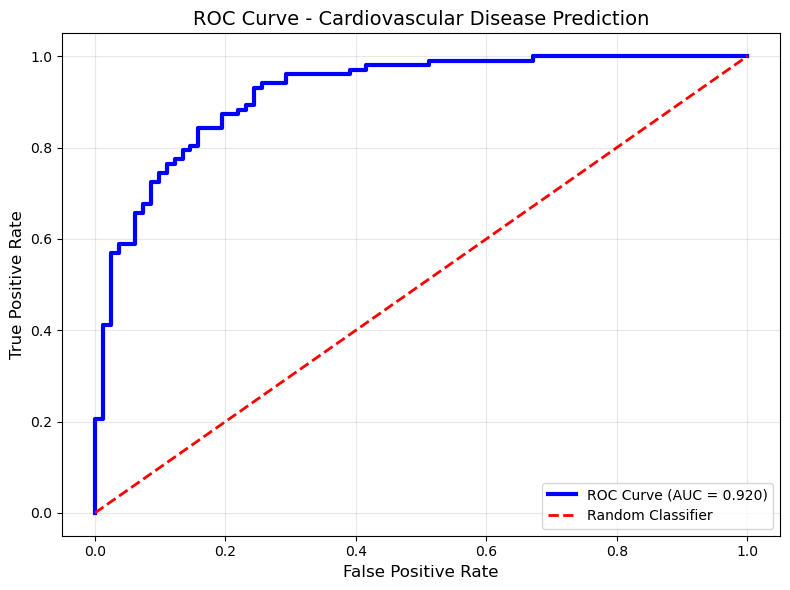

ROC-AUC Score: 0.9201


In [109]:
import matplotlib.pyplot as plt

# Comprehensive model evaluation
# ROC Curve Analysis
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=3, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Cardiovascular Disease Prediction', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")

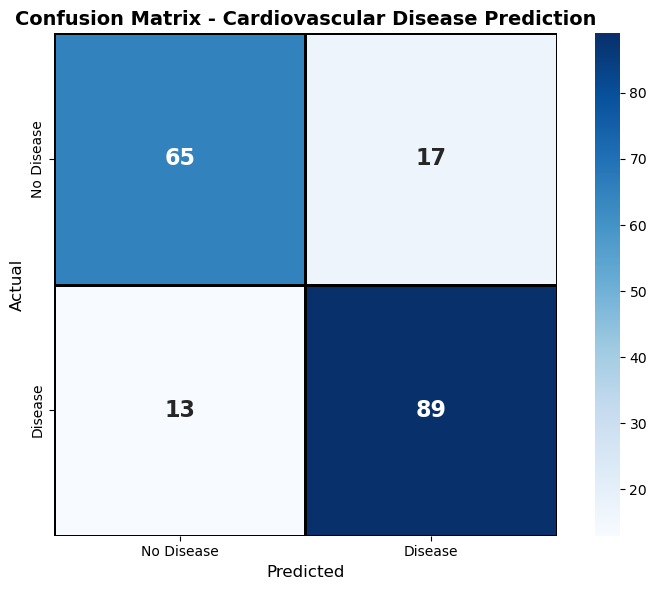


CONFUSION MATRIX ANALYSIS

True Negatives (correctly predicted no disease):   65
False Positives (incorrectly predicted disease):  17
False Negatives (missed disease cases):           13
True Positives (correctly predicted disease):     89

DETAILED PERFORMANCE METRICS
Accuracy:     0.8370 (83.70%)
Sensitivity:  0.8725 (87.25%) - Recall/TPR
Specificity:  0.7927 (79.27%) - TNR
Precision:    0.8396 (83.96%) - PPV
F1-Score:     0.8558 (85.58%)

CLINICAL INTERPRETATION
• We correctly identify 87.3% of patients with disease (Sensitivity)
• We correctly identify 79.3% of healthy patients (Specificity)
• When we predict disease, we're correct 84.0% of the time (Precision)
• Overall, 83.7% of our predictions are correct (Accuracy)


In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix creation
cm = confusion_matrix(y_test, y_pred)

# Extract values
tn, fp, fn, tp = cm.ravel()

# Confusion matrix heatmap creation
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'],
            cbar=True, square=True, linewidths=1, linecolor='black',
            annot_kws={'size': 16, 'weight': 'bold'})

plt.title('Confusion Matrix - Cardiovascular Disease Prediction', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

# Detailed confusion matrix commentary
print("\n" + "="*60)
print("CONFUSION MATRIX ANALYSIS")
print("="*60)
print(f"\nTrue Negatives (correctly predicted no disease):  {tn:3d}")
print(f"False Positives (incorrectly predicted disease): {fp:3d}")
print(f"False Negatives (missed disease cases):          {fn:3d}")
print(f"True Positives (correctly predicted disease):    {tp:3d}")

# Calculate and display metrics
total = tn + fp + fn + tp
accuracy = (tn + tp) / total
sensitivity = tp / (tp + fn)  # Recall / True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate
precision = tp / (tp + fp)    # Positive Predictive Value
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print("\n" + "="*60)
print("DETAILED PERFORMANCE METRICS")
print("="*60)
print(f"Accuracy:     {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Sensitivity:  {sensitivity:.4f} ({sensitivity*100:.2f}%) - Recall/TPR")
print(f"Specificity:  {specificity:.4f} ({specificity*100:.2f}%) - TNR")
print(f"Precision:    {precision:.4f} ({precision*100:.2f}%) - PPV")
print(f"F1-Score:     {f1:.4f} ({f1*100:.2f}%)")

print("\n" + "="*60)
print("CLINICAL INTERPRETATION")
print("="*60)
print(f"• We correctly identify {sensitivity*100:.1f}% of patients with disease (Sensitivity)")
print(f"• We correctly identify {specificity*100:.1f}% of healthy patients (Specificity)")
print(f"• When we predict disease, we're correct {precision*100:.1f}% of the time (Precision)")
print(f"• Overall, {accuracy*100:.1f}% of our predictions are correct (Accuracy)")
print("="*60)

In [114]:
# Feature importance analysis
print("\n FEATURE IMPORTANCE ANALYSIS:")
rf_model = best_model.named_steps['classifier']

#Feature names after preprocessing
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

#Feature importance dataframe
import pandas as pd
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n TOP 10 MOST IMPORTANT FEATURES:")
for i, row in feature_importance_df.head(10).iterrows():
    print(f"{row['feature']:30} {row['importance']:.4f}")

print("\n MODEL ANALYSIS COMPLETE!")


 FEATURE IMPORTANCE ANALYSIS:

 TOP 10 MOST IMPORTANT FEATURES:
num__exang                     0.1211
num__thalch                    0.1139
num__oldpeak                   0.1096
cat__cp_atypical angina        0.0950
num__age                       0.0820
cat__sex_Male                  0.0708
num__chol                      0.0677
cat__dataset_Switzerland       0.0593
num__trestbps                  0.0400
cat__thal_normal               0.0333

 MODEL ANALYSIS COMPLETE!


In [102]:
feature_importance_df

,feature,importance
5,num__exang,0.121090
4,num__thalch,0.113902
6,num__oldpeak,0.109645
14,cat__cp_atypical angina,0.095007
0,num__age,0.082021
10,cat__sex_Male,0.070755
2,num__chol,0.067672
12,cat__dataset_Switzerland,0.059290
1,num__trestbps,0.039950
21,cat__thal_normal,0.033339


In [115]:
# Save optimized model and preprocessing pipeline
import joblib

# Save the complete pipeline (preprocessor + classifier)
joblib.dump(best_model, 'uci_cardiovascular_model.pkl')

# Save additional components for Streamlit
model_info = {
    'best_params': rsearch.best_params_,
    'best_cv_score': rsearch.best_score_,
    'test_accuracy': accuracy_score(y_test, y_pred),
    'test_roc_auc': roc_auc_score(y_test, y_pred_proba),
    'feature_names': feature_names.tolist(),
    'feature_importance': rf_model.feature_importances_.tolist()
}

joblib.dump(model_info, 'uci_model_info.pkl')

print(" Model and metadata saved for Streamlit dashboard!")

 Model and metadata saved for Streamlit dashboard!
